In [1]:
import io
import os
from contextlib import redirect_stdout
import pandas as pd
import ktrain
import time
import statistics
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from ktrain import text
from tqdm import tqdm
from helper.modeltraining import *
import warnings
#warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Parameters

In [2]:
model_name = 'distilbert-base-uncased'
random_state = 1
dic = {0:'OTHER', 1:'ATTACK'}
number_of_groups = 7
number_tokens = 150
batch = 64
run = "200903-" + str(number_tokens) + "-"

# distance function
types = ['heuristic','agreement','cohen','krippendorff']
#selected_type  = types[3]

# data sampling
name = "Fully_Shared_Only"
#name = "Fully_Shared_Leave_out"

path_comments = "00_data/attack_annotated_comments.tsv"
path_annotations = "00_data/attack_annotations.tsv"
path_workers = "00_data/attack_worker_demographics.tsv"

path_store = "./01_processed_data/200903_run_004/datasplits/200903_louvian_"
path_images = "./03_results/200903_run_004/"

In [3]:
#start training
start = time.time()

  0%|          | 0/1 [00:00<?, ?it/s]

['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']



  0%|          | 0/7 [00:00<?, ?it/s]

['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
['ATTACK' 'OTHER']
preprocessing train...
language: en
train sequence lengths:
	mean : 71
	95percentile : 234
	99percentile : 629


/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ktrain/utils.py:573: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 71
	95percentile : 243
	99percentile : 665


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_19', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i



begin training using onecycle policy with max lr of 5e-06...
Train for 432 steps, validate for 96 steps
Epoch 1/2
432/432 [==============================] - 148s 341ms/step - loss: 0.3596 - accuracy: 0.8383 - val_loss: 0.1646 - val_accuracy: 0.9326
Epoch 2/2
432/432 [==============================] - 135s 312ms/step - loss: 0.1383 - accuracy: 0.9486 - val_loss: 0.1461 - val_accuracy: 0.9423
Run time: 4.842400689919789 min



 14%|█▍        | 1/7 [06:11<37:09, 371.62s/it]

[[0.8804780494539206, 0.7944940563428194, 0.7841792843619662, 0.7968738044674024, 0.7795000350515162, 0.7792340314266671, 0.7849051992599112]]
[[0.9491657977059437, 0.8997653806047967, 0.8918143899895725, 0.9005474452554745, 0.8907716371220021, 0.8886861313868614, 0.8963764337851928]]
[[0.9480084044238429, 0.8916557885154113, 0.8819607516744574, 0.8923572087181207, 0.8812982383402214, 0.8783122929604231, 0.8884848435807053]]
[[array([0.78987069, 0.97108541]), array([0.64740945, 0.94157867]), array([0.63176575, 0.93659282]), array([0.65175719, 0.94199042]), array([0.62286229, 0.93613778]), array([0.62378855, 0.93467952]), array([0.63006049, 0.93974991])]]
[[array([0.78987069, 0.97108541]), array([0.64740945, 0.94157867]), array([0.63176575, 0.93659282]), array([0.65175719, 0.94199042]), array([0.62286229, 0.93613778]), array([0.62378855, 0.93467952]), array([0.63006049, 0.93974991])]]
[[array([0.83390216, 0.96408067]), array([0.80318544, 0.91226262]), array([0.81001138, 0.90239953]), ar

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ktrain/utils.py:573: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 71
	95percentile : 243
	99percentile : 665


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_19', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i



begin training using onecycle policy with max lr of 5e-06...
Train for 432 steps, validate for 96 steps
Epoch 1/2
432/432 [==============================] - 148s 343ms/step - loss: 0.4348 - accuracy: 0.7978 - val_loss: 0.2794 - val_accuracy: 0.8899
Epoch 2/2
432/432 [==============================] - 135s 312ms/step - loss: 0.2675 - accuracy: 0.8973 - val_loss: 0.2701 - val_accuracy: 0.8928
Run time: 4.852941803137461 min



 29%|██▊       | 2/7 [12:24<30:59, 371.96s/it]

[[0.8804780494539206, 0.7944940563428194, 0.7841792843619662, 0.7968738044674024, 0.7795000350515162, 0.7792340314266671, 0.7849051992599112], [0.8819093880222333, 0.7985956966134409, 0.7918734514602258, 0.7988203937893467, 0.7832339289159256, 0.7849141076769178, 0.786572384428224]]
[[0.9491657977059437, 0.8997653806047967, 0.8918143899895725, 0.9005474452554745, 0.8907716371220021, 0.8886861313868614, 0.8963764337851928], [0.9487747653806048, 0.9001564129301356, 0.8940302398331595, 0.899895724713243, 0.8909019812304484, 0.889859228362878, 0.8954640250260688]]
[[0.9480084044238429, 0.8916557885154113, 0.8819607516744574, 0.8923572087181207, 0.8812982383402214, 0.8783122929604231, 0.8884848435807053], [0.9481377316451622, 0.8930725156833763, 0.8854205607386593, 0.8926468502997971, 0.8825187280356243, 0.8806748167932352, 0.888549008433359]]
[[array([0.78987069, 0.97108541]), array([0.64740945, 0.94157867]), array([0.63176575, 0.93659282]), array([0.65175719, 0.94199042]), array([0.622862

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ktrain/utils.py:573: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 71
	95percentile : 243
	99percentile : 665


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_19', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i



begin training using onecycle policy with max lr of 5e-06...
Train for 432 steps, validate for 96 steps
Epoch 1/2
432/432 [==============================] - 147s 341ms/step - loss: 0.4442 - accuracy: 0.7946 - val_loss: 0.3094 - val_accuracy: 0.8736
Epoch 2/2
432/432 [==============================] - 135s 312ms/step - loss: 0.2851 - accuracy: 0.8907 - val_loss: 0.2899 - val_accuracy: 0.8886
Run time: 4.839979036649068 min



 43%|████▎     | 3/7 [18:36<24:48, 372.05s/it]

[[0.8804780494539206, 0.7944940563428194, 0.7841792843619662, 0.7968738044674024, 0.7795000350515162, 0.7792340314266671, 0.7849051992599112], [0.8819093880222333, 0.7985956966134409, 0.7918734514602258, 0.7988203937893467, 0.7832339289159256, 0.7849141076769178, 0.786572384428224], [0.8738947832890276, 0.7968127703741053, 0.7917230568906428, 0.7944681945571823, 0.7802508988104235, 0.7843976431199255, 0.7871432067852644]]
[[0.9491657977059437, 0.8997653806047967, 0.8918143899895725, 0.9005474452554745, 0.8907716371220021, 0.8886861313868614, 0.8963764337851928], [0.9487747653806048, 0.9001564129301356, 0.8940302398331595, 0.899895724713243, 0.8909019812304484, 0.889859228362878, 0.8954640250260688], [0.9438216892596455, 0.8970281543274244, 0.891684045881126, 0.8954640250260688, 0.8869916579770596, 0.887252346193952, 0.893378519290928]]
[[0.9480084044238429, 0.8916557885154113, 0.8819607516744574, 0.8923572087181207, 0.8812982383402214, 0.8783122929604231, 0.8884848435807053], [0.948137

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ktrain/utils.py:573: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 71
	95percentile : 243
	99percentile : 665


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_19', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i



begin training using onecycle policy with max lr of 5e-06...
Train for 432 steps, validate for 96 steps
Epoch 1/2
432/432 [==============================] - 148s 342ms/step - loss: 0.4330 - accuracy: 0.7990 - val_loss: 0.2843 - val_accuracy: 0.8886
Epoch 2/2
432/432 [==============================] - 135s 313ms/step - loss: 0.2651 - accuracy: 0.8993 - val_loss: 0.2767 - val_accuracy: 0.8944
Run time: 4.851881074905395 min



 57%|█████▋    | 4/7 [24:49<18:37, 372.43s/it]

[[0.8804780494539206, 0.7944940563428194, 0.7841792843619662, 0.7968738044674024, 0.7795000350515162, 0.7792340314266671, 0.7849051992599112], [0.8819093880222333, 0.7985956966134409, 0.7918734514602258, 0.7988203937893467, 0.7832339289159256, 0.7849141076769178, 0.786572384428224], [0.8738947832890276, 0.7968127703741053, 0.7917230568906428, 0.7944681945571823, 0.7802508988104235, 0.7843976431199255, 0.7871432067852644], [0.8786327019785523, 0.7953728976187431, 0.7861894063823494, 0.7961309523809523, 0.7790559485041877, 0.7807998185729338, 0.7849337329608387]]
[[0.9491657977059437, 0.8997653806047967, 0.8918143899895725, 0.9005474452554745, 0.8907716371220021, 0.8886861313868614, 0.8963764337851928], [0.9487747653806048, 0.9001564129301356, 0.8940302398331595, 0.899895724713243, 0.8909019812304484, 0.889859228362878, 0.8954640250260688], [0.9438216892596455, 0.8970281543274244, 0.891684045881126, 0.8954640250260688, 0.8869916579770596, 0.887252346193952, 0.893378519290928], [0.9472106

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ktrain/utils.py:573: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 71
	95percentile : 243
	99percentile : 665


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_19', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i



begin training using onecycle policy with max lr of 5e-06...
Train for 432 steps, validate for 96 steps
Epoch 1/2
432/432 [==============================] - 148s 342ms/step - loss: 0.4423 - accuracy: 0.7959 - val_loss: 0.2954 - val_accuracy: 0.8873
Epoch 2/2
432/432 [==============================] - 135s 311ms/step - loss: 0.2837 - accuracy: 0.8909 - val_loss: 0.2858 - val_accuracy: 0.8892
Run time: 4.834574631849924 min



 71%|███████▏  | 5/7 [31:01<12:24, 372.13s/it]

[[0.8804780494539206, 0.7944940563428194, 0.7841792843619662, 0.7968738044674024, 0.7795000350515162, 0.7792340314266671, 0.7849051992599112], [0.8819093880222333, 0.7985956966134409, 0.7918734514602258, 0.7988203937893467, 0.7832339289159256, 0.7849141076769178, 0.786572384428224], [0.8738947832890276, 0.7968127703741053, 0.7917230568906428, 0.7944681945571823, 0.7802508988104235, 0.7843976431199255, 0.7871432067852644], [0.8786327019785523, 0.7953728976187431, 0.7861894063823494, 0.7961309523809523, 0.7790559485041877, 0.7807998185729338, 0.7849337329608387], [0.8722453791983139, 0.7948663101604279, 0.7836944278174751, 0.7930201329543676, 0.7806884526596428, 0.7808697793811777, 0.7844823929949837]]
[[0.9491657977059437, 0.8997653806047967, 0.8918143899895725, 0.9005474452554745, 0.8907716371220021, 0.8886861313868614, 0.8963764337851928], [0.9487747653806048, 0.9001564129301356, 0.8940302398331595, 0.899895724713243, 0.8909019812304484, 0.889859228362878, 0.8954640250260688], [0.9438

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ktrain/utils.py:573: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 71
	95percentile : 243
	99percentile : 665


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_19', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i



begin training using onecycle policy with max lr of 5e-06...
Train for 432 steps, validate for 96 steps
Epoch 1/2
432/432 [==============================] - 147s 340ms/step - loss: 0.4410 - accuracy: 0.7927 - val_loss: 0.2837 - val_accuracy: 0.8856
Epoch 2/2
432/432 [==============================] - 135s 313ms/step - loss: 0.2773 - accuracy: 0.8916 - val_loss: 0.2708 - val_accuracy: 0.8938
Run time: 4.835376485188802 min



 86%|████████▌ | 6/7 [37:12<06:11, 371.85s/it]

[[0.8804780494539206, 0.7944940563428194, 0.7841792843619662, 0.7968738044674024, 0.7795000350515162, 0.7792340314266671, 0.7849051992599112], [0.8819093880222333, 0.7985956966134409, 0.7918734514602258, 0.7988203937893467, 0.7832339289159256, 0.7849141076769178, 0.786572384428224], [0.8738947832890276, 0.7968127703741053, 0.7917230568906428, 0.7944681945571823, 0.7802508988104235, 0.7843976431199255, 0.7871432067852644], [0.8786327019785523, 0.7953728976187431, 0.7861894063823494, 0.7961309523809523, 0.7790559485041877, 0.7807998185729338, 0.7849337329608387], [0.8722453791983139, 0.7948663101604279, 0.7836944278174751, 0.7930201329543676, 0.7806884526596428, 0.7808697793811777, 0.7844823929949837], [0.873892788649048, 0.8011621574469867, 0.796484175266834, 0.7973042683013016, 0.7821989608158466, 0.787726416244849, 0.7911543918275613]]
[[0.9491657977059437, 0.8997653806047967, 0.8918143899895725, 0.9005474452554745, 0.8907716371220021, 0.8886861313868614, 0.8963764337851928], [0.94877

	mean : 71
	95percentile : 234
	99percentile : 629


/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/ktrain/utils.py:573: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 71
	95percentile : 243
	99percentile : 665


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_19', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i



begin training using onecycle policy with max lr of 5e-06...
Train for 432 steps, validate for 96 steps
Epoch 1/2
432/432 [==============================] - 147s 339ms/step - loss: 0.4358 - accuracy: 0.7970 - val_loss: 0.2816 - val_accuracy: 0.8905
Epoch 2/2
432/432 [==============================] - 135s 312ms/step - loss: 0.2784 - accuracy: 0.8916 - val_loss: 0.2758 - val_accuracy: 0.8944
Run time: 4.835169366995493 min



100%|██████████| 7/7 [43:23<00:00, 371.96s/it]

[[0.8804780494539206, 0.7944940563428194, 0.7841792843619662, 0.7968738044674024, 0.7795000350515162, 0.7792340314266671, 0.7849051992599112], [0.8819093880222333, 0.7985956966134409, 0.7918734514602258, 0.7988203937893467, 0.7832339289159256, 0.7849141076769178, 0.786572384428224], [0.8738947832890276, 0.7968127703741053, 0.7917230568906428, 0.7944681945571823, 0.7802508988104235, 0.7843976431199255, 0.7871432067852644], [0.8786327019785523, 0.7953728976187431, 0.7861894063823494, 0.7961309523809523, 0.7790559485041877, 0.7807998185729338, 0.7849337329608387], [0.8722453791983139, 0.7948663101604279, 0.7836944278174751, 0.7930201329543676, 0.7806884526596428, 0.7808697793811777, 0.7844823929949837], [0.873892788649048, 0.8011621574469867, 0.796484175266834, 0.7973042683013016, 0.7821989608158466, 0.787726416244849, 0.7911543918275613], [0.8799466897794012, 0.7930376419918084, 0.7821976924278924, 0.7916903053748838, 0.7753441400149601, 0.7762006959348238, 0.7828227883933886]]
[[0.94916


100%|██████████| 1/1 [43:50<00:00, 2630.06s/it]


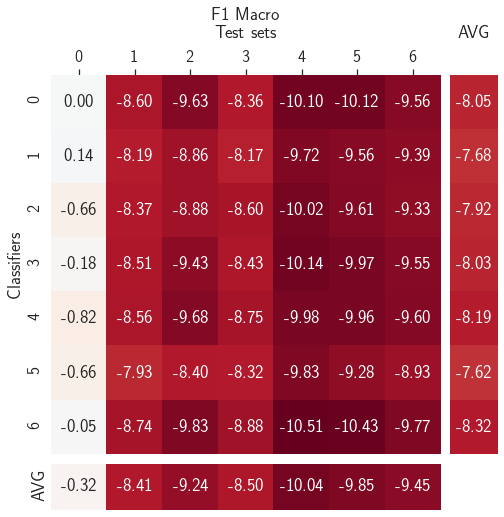

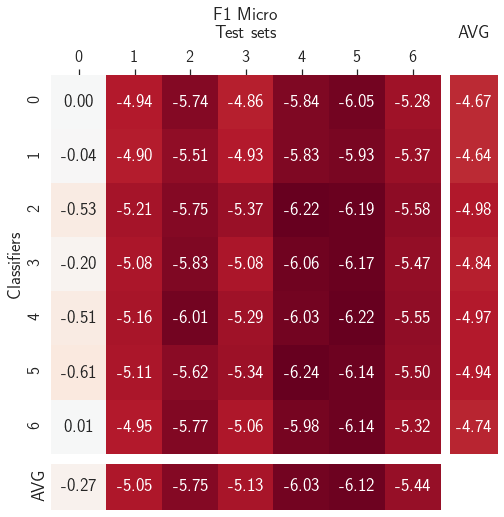

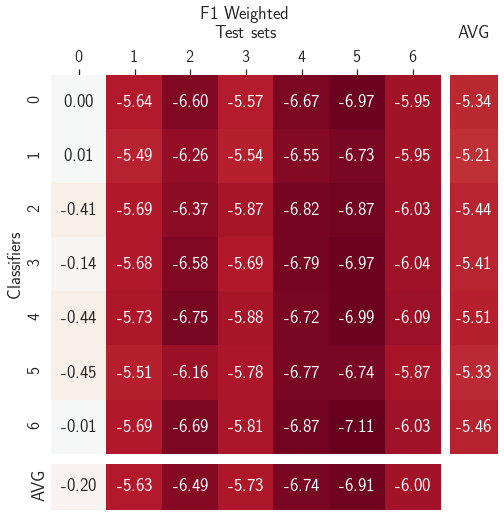

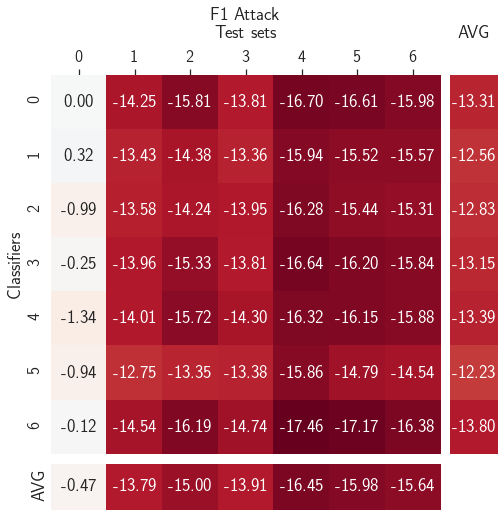

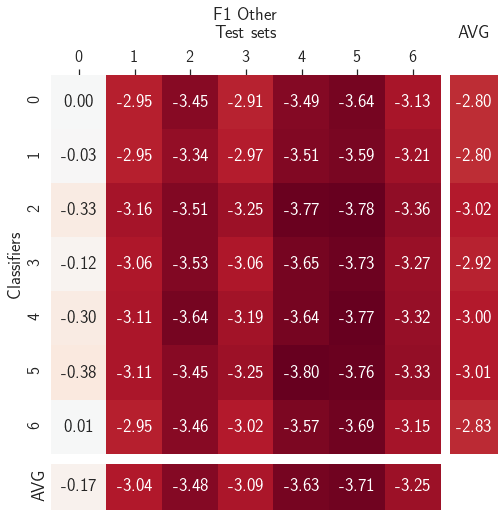

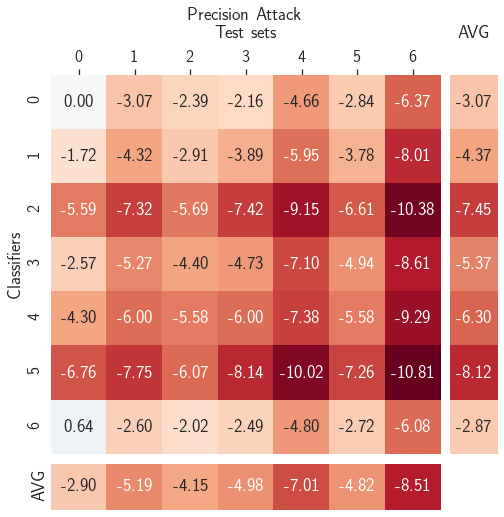

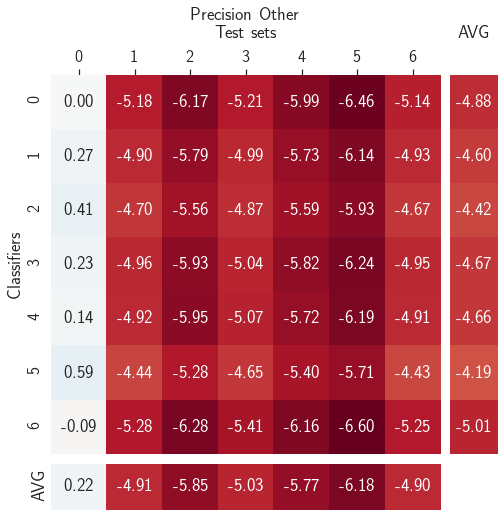

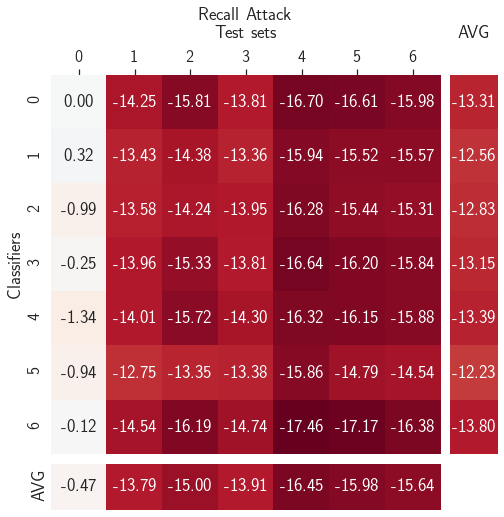

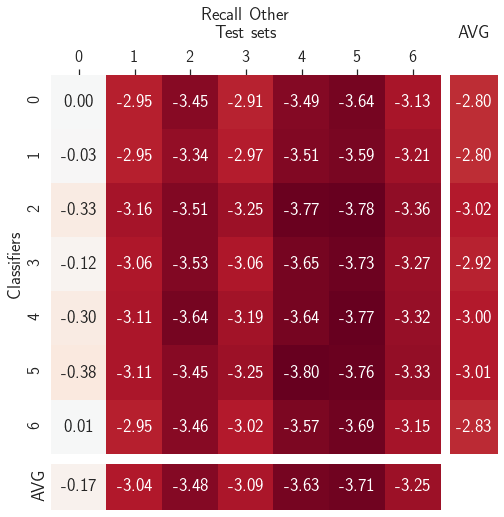

In [4]:
if __name__ == '__main__':
    manager = multiprocessing.Manager()
        
    for h in tqdm(range(0,len(types))):
        col_f1_macro = manager.list()
        col_f1_micro = manager.list()
        col_f1_weighted = manager.list()
        col_f1_class_0 = manager.list() 
        col_f1_class_1 = manager.list() 
        col_precision = manager.list()  
        col_recall = manager.list()  
        col_test_pred = manager.list() 
        
        selected_type  = types[h]
        path_files = path_store + selected_type + "_" + name + "_"
        
        # load data
        col_x_train,col_y_train,col_x_dev,col_y_dev,col_x_test,col_y_test,stat = loadData(number_of_groups,path_files,dic,random_state=random_state)
        
        # train classifiers
        for i in tqdm(range(0,number_of_groups)):

            #trap = io.StringIO()
            #with redirect_stdout(trap):
            process_eval = multiprocessing.Process(target=train_model,args=(i,
                            col_f1_macro,col_f1_micro,col_f1_weighted,col_f1_class_0,col_f1_class_1,col_test_pred,col_precision,col_recall,
                            model_name,number_tokens,batch,
                            col_x_train,col_y_train,col_x_dev,col_y_dev,col_x_test,col_y_test))
            process_eval.start()
            process_eval.join()

            print(col_f1_macro)
            print(col_f1_micro)
            print(col_f1_weighted)
            print(col_f1_class_0)
            print(col_f1_class_1)
            print(col_precision)
            print(col_recall)

        class_0,class_1 = splitClassF1Scores(col_f1_class_0)
        precision_0,precision_1 = splitClassF1Scores(col_precision)
        recall_0,recall_1 = splitClassF1Scores(col_recall)

        plotMatrix(col_f1_macro,"F1 Macro", name, path_images,run+selected_type+"-")
        plotMatrix(col_f1_micro,"F1 Micro", name, path_images,run+selected_type+"-")
        plotMatrix(col_f1_weighted,"F1 Weighted", name, path_images,run+selected_type+"-")
        plotMatrix(class_0,"F1 Attack", name, path_images,run+selected_type+"-")
        plotMatrix(class_1,"F1 Other", name, path_images,run+selected_type+"-")
        plotMatrix(precision_0,"Precision Attack", name, path_images,run+selected_type+"-")
        plotMatrix(precision_1,"Precision Other", name, path_images,run+selected_type+"-")
        plotMatrix(recall_0,"Recall Attack", name, path_images,run+selected_type+"-")
        plotMatrix(recall_1,"Recall Other", name, path_images,run+selected_type+"-")
                           

In [5]:
end = time.time()
print("Run time:", (end - start)/60,"min")

Run time: 43.906259044011435 min


In [6]:
#!pip install git+https://github.com/amaiya/eli5@tfkeras_0_10_1